In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
gas = pd.read_csv('gas_prices.csv')
gas.head(2)


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.0,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.3,2.49,3.01,1.14


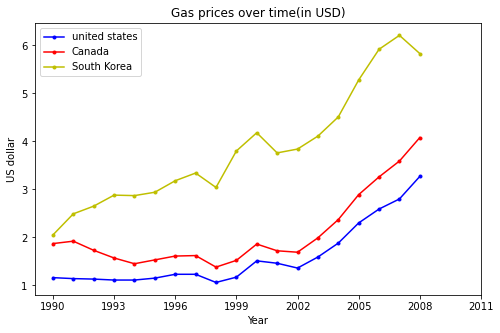

In [49]:
plt.figure(figsize=(8,5))

plt.title('Gas prices over time(in USD)')
plt.plot(gas.Year, gas.USA, 'b.-', label='united states')
plt.plot(gas.Year, gas.Canada,'r.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'], 'y.-', label='South Korea')

#countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#  if country in countries_to_look_at:
#      plt.plot(gas.Year, gas[country], marker='.')
            
plt.xticks(gas.Year[::3].tolist()+[2011])
plt.xlabel('Year')
plt.ylabel('US dollar')
plt.legend()

plt.savefig('gas price fig', dpi=300)
plt.show()

In [3]:
fifa =pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Histograms

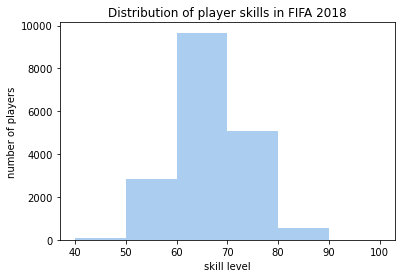

In [5]:
bins=[40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='#abcdef')

plt.ylabel('number of players')
plt.xlabel('skill level')
plt.title('Distribution of player skills in FIFA 2018')

plt.show()

# pie chart

In [17]:
#to make the weight int and stip the Ibs
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

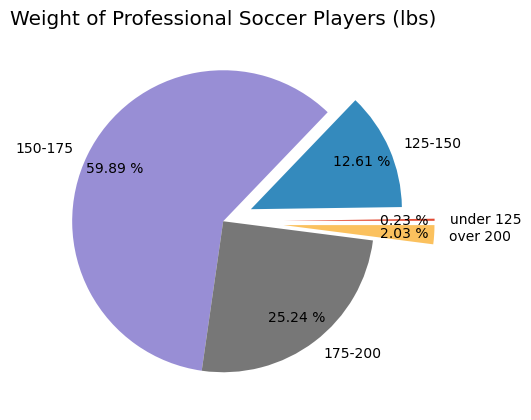

In [36]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')

fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

# pie chart


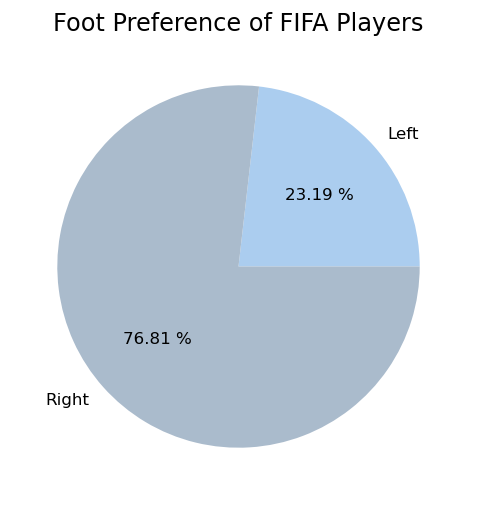

In [38]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.figure(figsize=(8,5), dpi=120)

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

# Box and Whiskers Chart

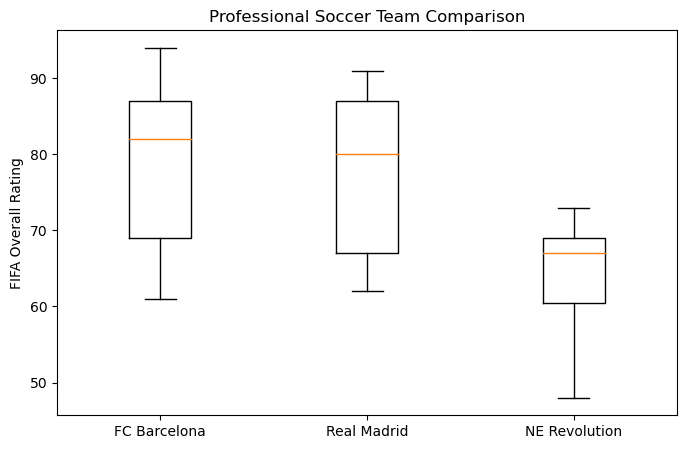

In [43]:
plt.figure(figsize=(8,5), dpi=100)
plt.style.use('default')

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

labels=['FC Barcelona','Real Madrid','NE Revolution']

plt.boxplot([ barcelona,madrid, revs], labels=labels)

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()